In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [2]:
from DataPrep.ImportData import importer
from Modelling import modelling
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
import torch
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
m = modelling()
df = m.df.drop(columns=["Start Date", "Charging Time (mins)", "Total Duration (mins)", "Port Number"])

In [4]:
cols_to_standardize = ['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

In [5]:
sc = StandardScaler()
stand_poi = sc.fit_transform(df[cols_to_standardize])

In [6]:
stand_poi = pd.DataFrame(stand_poi, index=df.index, columns=cols_to_standardize)

In [7]:
for i in cols_to_standardize:
    df[i] = stand_poi[i]

In [8]:
df["Label"] = df["Label"] + 1

In [9]:
#df = df.drop(columns=cols_to_standardize)

In [9]:
df = df.fillna(0)

In [10]:
X_train,X_test, X_val,y_train,y_test, y_val = m.ttsplit(df)

In [124]:
test = y_train[X_train.Label == 7.0]

In [125]:
test.shape

(1061,)

In [126]:
for i in range(100, len(test), 100):
    print(test[0:i].std())

0.49884272576977046
0.45819825084766636
0.44988140931874904
0.4622983999017689
0.45364998868721823
0.4440680015417029
0.44526266748349075
0.45309817150012105
0.4528887139012484
0.4513413792214217


In [11]:
X_train

,Label,CenterLon,CenterLat,Level 1,Level 2,# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,...,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,is_holiday,is_weekend
11679,5.0,-122.139,37.445,0,31,-2.010974,-1.883729,-1.676792,-1.520665,-1.543145,...,0,0,0,0,0,0,0,1,0,0
4457,2.0,-122.163,37.444,3,25,0.471414,0.539809,-0.030593,0.918708,0.671722,...,0,0,0,1,0,0,0,0,0,0
11753,5.0,-122.139,37.445,0,26,-2.010974,-1.883729,-1.676792,-1.520665,-1.543145,...,0,0,0,0,0,0,0,0,0,0
15149,7.0,-122.146,37.426,0,33,0.332912,0.202355,1.163480,-0.484248,-0.512086,...,0,0,0,0,0,0,0,0,0,0
289,1.0,-122.160,37.444,0,18,0.865613,0.836360,0.444718,1.032461,1.187251,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,7.0,-122.146,37.426,0,33,0.332912,0.202355,1.163480,-0.484248,-0.512086,...,0,0,0,0,1,0,0,0,0,0
14191,6.0,-122.158,37.448,0,34,0.300949,-0.063519,0.178080,-0.711754,-0.435712,...,0,1,0,0,0,0,0,0,0,0
13677,6.0,-122.158,37.448,0,36,0.300949,-0.063519,0.178080,-0.711754,-0.435712,...,0,0,0,0,0,0,0,0,0,0
4064,2.0,-122.163,37.444,1,8,0.471414,0.539809,-0.030593,0.918708,0.671722,...,0,0,1,0,0,0,0,0,0,0


In [12]:
labels = df.Label.unique()

In [13]:
stackings_X_test = []
stackings_X_train = []
stackings_X_val = []
stackings_y_test = []
stackings_y_train = []
stackings_y_val = []
for l in labels:
    stackings_X_test.append(tf.ragged.constant(X_test[X_test.Label == l]))
    stackings_y_test.append((tf.ragged.constant(y_test[X_test.Label == l])))
    stackings_X_train.append((tf.ragged.constant(X_train[X_train.Label == l])))
    stackings_y_train.append((tf.ragged.constant(y_train[X_train.Label == l])))
    stackings_X_val.append((tf.ragged.constant(X_val[X_val.Label == l])))
    stackings_y_val.append((tf.ragged.constant(y_val[X_val.Label == l])))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df.isna().sum().sum()

0

In [16]:
for i in range(65):
    if X_train.isna().sum()[i] > 0:
        print(i)

In [17]:
X_train.columns[14]

'Month_Day_2'

In [14]:
X_train_stack = tf.ragged.stack(stackings_X_train).to_tensor()
X_test_stack =  tf.ragged.stack(stackings_X_test).to_tensor()
X_val_stack =tf.ragged.stack(stackings_X_val).to_tensor()
y_train_stack = tf.ragged.stack(stackings_y_train).to_tensor()
y_test_stack = tf.ragged.stack(stackings_y_test).to_tensor()
y_val_stack = tf.ragged.stack(stackings_y_val).to_tensor()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

m = Sequential()
m.add(Input(shape=(None,75), dtype=tf.float32))
m.add(LSTM(68, return_sequences = True, activation = "relu"))

m.add(Dense(1))

m.compile(optimizer="adam", loss='mse', metrics=[tf.keras.losses.MAPE])

history = m.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=20 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])), callbacks=tensorboard_callback)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/20
140/140 [==============================] - 4s 14ms/step - loss: 1.8349 - mean_absolute_percentage_error: 4448460.1613 - val_loss: 0.2745 - val_mean_absolute_percentage_error: 12.2141
Epoch 2/20
140/140 [==============================] - 1s 5ms/step - loss: 0.2584 - mean_absolute_percentage_error: 15.1842 - val_loss: 0.2060 - val_mean_absolute_percentage_error: 11.2391
Epoch 3/20
140/140 [==============================] - 1s 6ms/step - loss: 0.2021 - mean_absolute_percentage_error: 12.0928 - val_loss: 0.2054 - val_mean_absolute_percentage_error: 10.8239
Epoch 4/20
140/140 [==============================] - 1s 6ms/step - loss: 0.1983 - mean_absolute_percentage_error: 12.4563 - val_loss: 0.2022 - val_mean_absolute_percentage_error: 10.7839
Epoch 5/20
140/140 [==============================] - 1s 6ms/step - loss: 0.1925 - mean_absolute_percentage_error: 13.3821 - val_loss: 0.2023 - val_mean_absolute_percentage_error: 11.1375
Epoch 6/20
140/140 [==============================] - 

In [83]:
y_pred = m.predict(tf.transpose(X_test_stack,perm=[1, 0, 2]))


<IPython.core.display.Javascript object>

In [30]:
tf.keras.utils.plot_model(m)

<IPython.core.display.Javascript object>

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [110]:
import tensorboard

In [111]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [112]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 87031), started 1 day, 9:34:19 ago. (Use '!kill 87031' to kill it.)

In [91]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [107]:
from sklearn.metrics  import mean_absolute_percentage_error, mean_absolute_error


In [109]:
for i in range(8):
    mse = np.sqrt(mean_squared_error(tf.transpose(y_pred, perm=[1,0,2])[i],tf.transpose(y_test_stack[i])))
    r2 = r2_score(tf.transpose(y_pred, perm=[1,0,2])[i],tf.transpose(y_test_stack[i]))
    MAPE = mean_absolute_percentage_error(tf.transpose(y_test_stack[i]),tf.transpose(y_pred, perm=[1,0,2])[i])
    MAE = mean_absolute_error(tf.transpose(y_test_stack[i]),tf.transpose(y_pred, perm=[1,0,2])[i])
    print(50*"-")
    print(f"Cluster: {i}\nR^2:{r2}\nRMSE:{mse}\nMAPE:{MAPE}\nMAE:{MAE}")
    print(50*"-")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 0
R^2:-0.1999529389341157
RMSE:0.4152438459346445
MAPE:0.16497265139837633
MAE:0.32311288103020813
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 1
R^2:0.6833991050415906
RMSE:0.49107252710736726
MAPE:0.1787044021669029
MAE:0.3609051496746765
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 2
R^2:0.023167746697486336
RMSE:0.3864911354513035
MAPE:0.15466978044970073
MAE:0.2959448455162656
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 3
R^2:0.9008680712555039
RMSE:0.6776808558170313
MAPE:0.10685375477782277
MAE:0.4009179247152683
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 4
R^2:0.8628048780760406
RMSE:0.4261467063967375
MAPE:0.11097803356049094
MAE:0.24839161696729406
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 5
R^2:0.9594878947093206
RMSE:0.31385634323348593
MAPE:0.061027092490924945
MAE:0.17888906120560422
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 6
R^2:0.9270253381491188
RMSE:0.3347476402418277
MAPE:0.06125828964466609
MAE:0.14716839151215289
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 7
R^2:0.897594884200344
RMSE:0.4620339083960808
MAPE:0.08327481542373479
MAE:0.2129749354241772
--------------------------------------------------


In [139]:
y_test[X_test.Label == 2.0]

4762    2.402293
4634    1.892402
5762    3.353333
3651    2.002261
3422    1.359719
          ...   
3971    1.913052
5478    2.921677
4398    2.114374
5564    2.988385
4519    2.586975
Name: Energy (kWh), Length: 571, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

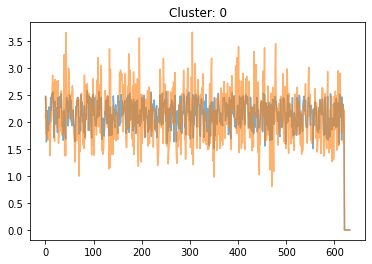

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

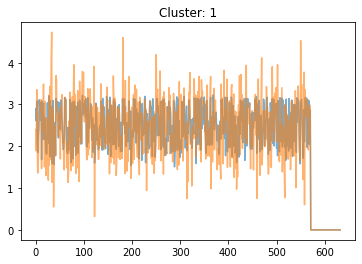

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

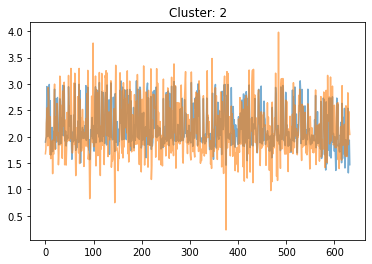

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

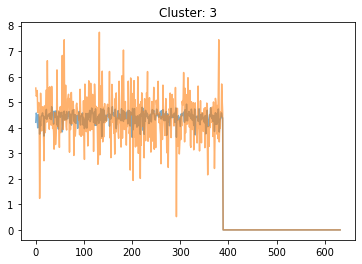

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

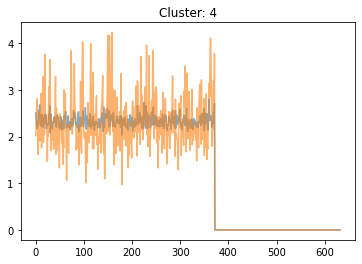

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

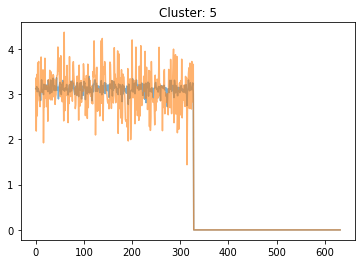

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

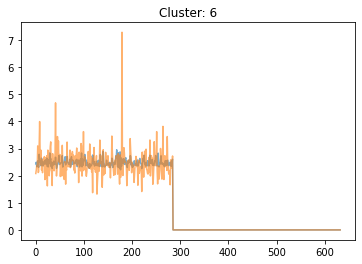

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

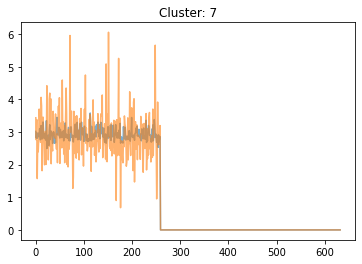

In [134]:
for i in range(8):
    plt.plot(tf.transpose(y_pred)[0][i],  alpha= 0.6)    
    plt.plot(y_test_stack[i], alpha= 0.6)
    plt.title(f'Cluster: {i}')
    plt.show()

In [29]:
df["Label"][df.Label.isin([1,2,3,6])] = 6

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
labels = list(df.Label.unique())

In [33]:
stackings_X_test = []
stackings_X_train = []
stackings_X_val = []
stackings_y_test = []
stackings_y_train = []
stackings_y_val = []
for l in labels:
    stackings_X_test.append(tf.ragged.constant(X_test[X_test.Label == l]))
    stackings_y_test.append((tf.ragged.constant(y_test[X_test.Label == l])))
    stackings_X_train.append((tf.ragged.constant(X_train[X_train.Label == l])))
    stackings_y_train.append((tf.ragged.constant(y_train[X_train.Label == l])))
    stackings_X_val.append((tf.ragged.constant(X_val[X_val.Label == l])))
    stackings_y_val.append((tf.ragged.constant(y_val[X_val.Label == l])))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
X_train_stack = tf.ragged.stack(stackings_X_train).to_tensor()
X_test_stack =  tf.ragged.stack(stackings_X_test).to_tensor()
X_val_stack =tf.ragged.stack(stackings_X_val).to_tensor()
y_train_stack = tf.ragged.stack(stackings_y_train).to_tensor()
y_test_stack = tf.ragged.stack(stackings_y_test).to_tensor()
y_val_stack = tf.ragged.stack(stackings_y_val).to_tensor()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
m = Sequential()
m.add(Input(shape=(None,75), dtype=tf.float32))
m.add(LSTM(68, return_sequences = True, activation = "tanh"))
m.add(Dropout(0.5))
m.add(LSTM(32, return_sequences = True, activation = "tanh"))
m.add(Dense(1, activation="relu"))

m.compile(optimizer="adam", loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = m.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=20 , batch_size=16, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/20
85/85 [==============================] - 4s 15ms/step - loss: 5.1543 - root_mean_squared_error: 2.2400 - val_loss: 0.6929 - val_root_mean_squared_error: 0.8324
Epoch 2/20
85/85 [==============================] - 0s 6ms/step - loss: 0.7326 - root_mean_squared_error: 0.8553 - val_loss: 0.3835 - val_root_mean_squared_error: 0.6193
Epoch 3/20
85/85 [==============================] - 0s 6ms/step - loss: 0.5180 - root_mean_squared_error: 0.7195 - val_loss: 0.3550 - val_root_mean_squared_error: 0.5958
Epoch 4/20
85/85 [==============================] - 0s 6ms/step - loss: 0.4695 - root_mean_squared_error: 0.6850 - val_loss: 0.3702 - val_root_mean_squared_error: 0.6084
Epoch 5/20
85/85 [==============================] - 0s 5ms/step - loss: 0.4364 - root_mean_squared_error: 0.6604 - val_loss: 0.3921 - val_root_mean_squared_error: 0.6262
Epoch 6/20
85/85 [==============================] - 0s 5ms/step - loss: 0.4151 - root_mean_squared_error: 0.6443 - val_loss: 0.3890 - val_root_mean_s

In [36]:
y_pred = m.predict(tf.transpose(X_test_stack,perm=[1, 0, 2]))

<IPython.core.display.Javascript object>

In [40]:
for i in range(5):
    mse = np.sqrt(mean_squared_error(tf.transpose(y_pred, perm=[1,0,2])[i],tf.transpose(y_test_stack[i])))
    r2 = r2_score(tf.transpose(y_pred, perm=[1,0,2])[i],tf.transpose(y_test_stack[i]))
    print(50*"-")
    print(f"Cluster: {labels[i]}\nR^2:{r2}\nRMSE:{mse}")
    print(50*"-")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 6.0
R^2:0.861777116131256
RMSE:0.4091262361132492
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 4.0
R^2:-27.577234283705778
RMSE:0.8784602447940987
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 5.0
R^2:-0.4977113939403077
RMSE:0.5762596862738196
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 7.0
R^2:0.8270859257288995
RMSE:0.4431766313637862
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------
Cluster: 8.0
R^2:0.795883609561372
RMSE:0.5957265844451659
--------------------------------------------------


In [45]:
X_train.shape

(12445, 75)

In [47]:
X_val.shape

(1383, 75)

In [50]:
m = Sequential()
m.add(Input(shape=(75,1), dtype=tf.float32))
m.add(LSTM(68, return_sequences = True, activation = "tanh"))
m.add(Dropout(0.5))
m.add(LSTM(32, return_sequences = True, activation = "tanh"))
m.add(Dense(1, activation="relu"))

m.compile(optimizer="adam", loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = m.fit(np.array(X_train).reshape(12445,75,1), y_train, epochs=20 , batch_size=256, validation_data=(np.array(X_val).reshape(1383,75,1), y_val))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/20
49/49 [==============================] - 10s 131ms/step - loss: 4.5344 - root_mean_squared_error: 2.0890 - val_loss: 0.9850 - val_root_mean_squared_error: 0.9925
Epoch 2/20
49/49 [==============================] - 5s 105ms/step - loss: 0.9597 - root_mean_squared_error: 0.9795 - val_loss: 0.9460 - val_root_mean_squared_error: 0.9726
Epoch 3/20
49/49 [==============================] - 5s 106ms/step - loss: 0.9167 - root_mean_squared_error: 0.9573 - val_loss: 0.8819 - val_root_mean_squared_error: 0.9391
Epoch 4/20
49/49 [==============================] - 5s 105ms/step - loss: 0.8245 - root_mean_squared_error: 0.9080 - val_loss: 0.7408 - val_root_mean_squared_error: 0.8607
Epoch 5/20
49/49 [==============================] - 5s 106ms/step - loss: 0.7615 - root_mean_squared_error: 0.8726 - val_loss: 0.7038 - val_root_mean_squared_error: 0.8389
Epoch 6/20
49/49 [==============================] - 5s 107ms/step - loss: 0.6981 - root_mean_squared_error: 0.8355 - val_loss: 0.6777 - val